In [1]:
import pandas as pd
beer = pd.read_csv('data.txt',sep=',')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,15,4.9,0.43
2,LowernBrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Abbnes,161,11,5.0,0.73
5,Lieksl,152,11,5.0,0.77
6,Nkiwkk,145,23,4.6,0.23
7,Nkilse,175,24,5.5,0.42
8,Ulisefs,149,27,4.7,0.40
9,Ulinss,154,28,3.6,0.35


In [2]:
X = beer[['calories','sodium','alcohol','cost']]

K-means clustering 

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [4]:
km.labels_

array([0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1])

In [5]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,15,4.9,0.43,0,1
2,LowernBrau,157,15,0.9,0.48,0,1
5,Lieksl,152,11,5.0,0.77,0,1
6,Nkiwkk,145,23,4.6,0.23,0,1
8,Ulisefs,149,27,4.7,0.40,0,1
9,Ulinss,154,28,3.6,0.35,0,1
10,Qsedse,135,11,4.2,0.36,0,1
11,Abbiue,150,19,4.7,0.61,0,1
13,Ocean,131,19,4.4,0.79,0,1


In [6]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

cluster_center = km.cluster_centers_
cluster_center2 = km2.cluster_centers_
print(cluster_center)

[[146.8         18.3          4.17         0.485     ]
 [ 82.5         11.           3.25         0.505     ]
 [168.66666667  14.           5.23333333   0.62666667]]


In [7]:
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,146.800000,18.3,4.170000,0.485000,1
1,82.500000,11.0,3.250000,0.505000,0
2,168.666667,14.0,5.233333,0.626667,1


In [8]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,82.500000,11.000000,3.250000,0.505000,1.000000
1,151.846154,17.307692,4.415385,0.517692,0.461538


In [9]:
centers = beer.groupby('cluster').mean().reset_index()
print(centers)

   cluster    calories  sodium   alcohol      cost  cluster2
0        0  146.800000    18.3  4.170000  0.485000         1
1        1   82.500000    11.0  3.250000  0.505000         0
2        2  168.666667    14.0  5.233333  0.626667         1


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams['font.size'] = 14

In [11]:
import numpy as np 
colors = np.array(['red','blue','green','yellow'])
print(colors[beer['cluster']])

['red' 'red' 'red' 'green' 'green' 'red' 'red' 'green' 'red' 'red' 'red'
 'red' 'blue' 'red' 'blue']


Text(0,0.5,'Alcohol')

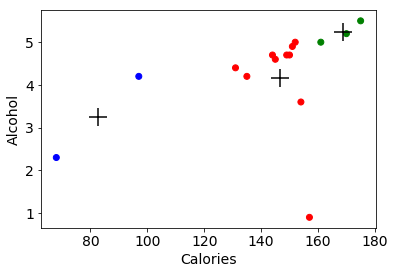

In [12]:
plt.scatter(beer['calories'],beer['alcohol'],c=colors[beer['cluster']])
plt.scatter(centers.calories,centers.alcohol,linewidths=3,marker='+',s=300,c='black')
plt.xlabel('Calories')
plt.ylabel('Alcohol')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


Text(0.5,0.98,'with 3 centroids initialized')

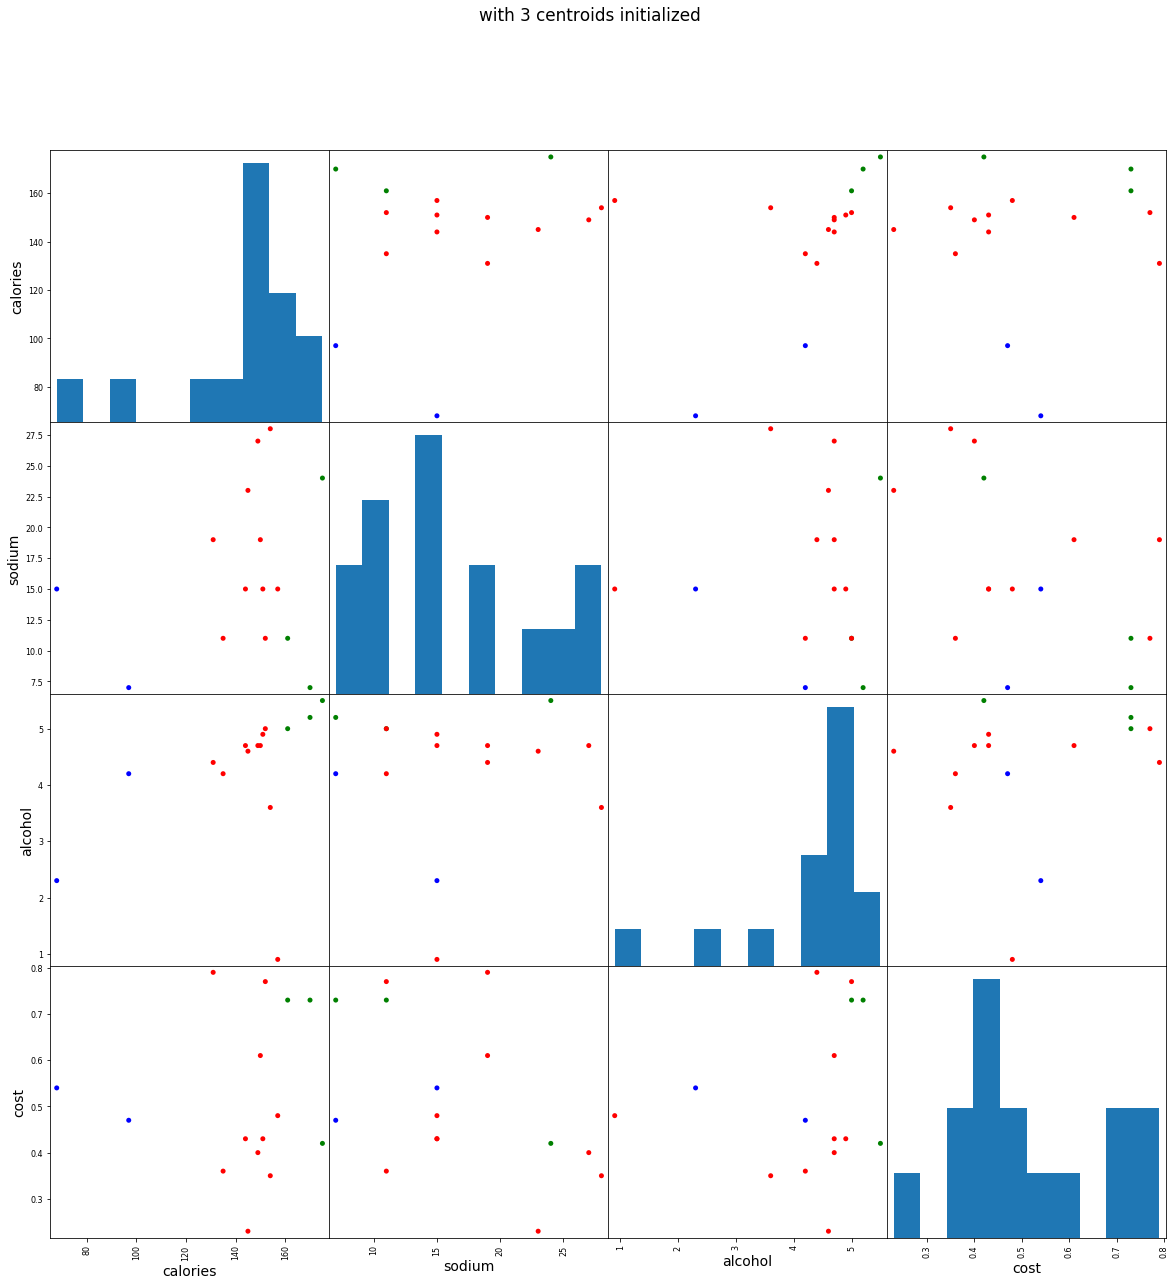

In [13]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100,alpha=1,c=colors[beer['cluster']],figsize=(20,20))
plt.suptitle("with 3 centroids initialized")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


Text(0.5,0.98,'with 2 centroids initialized')

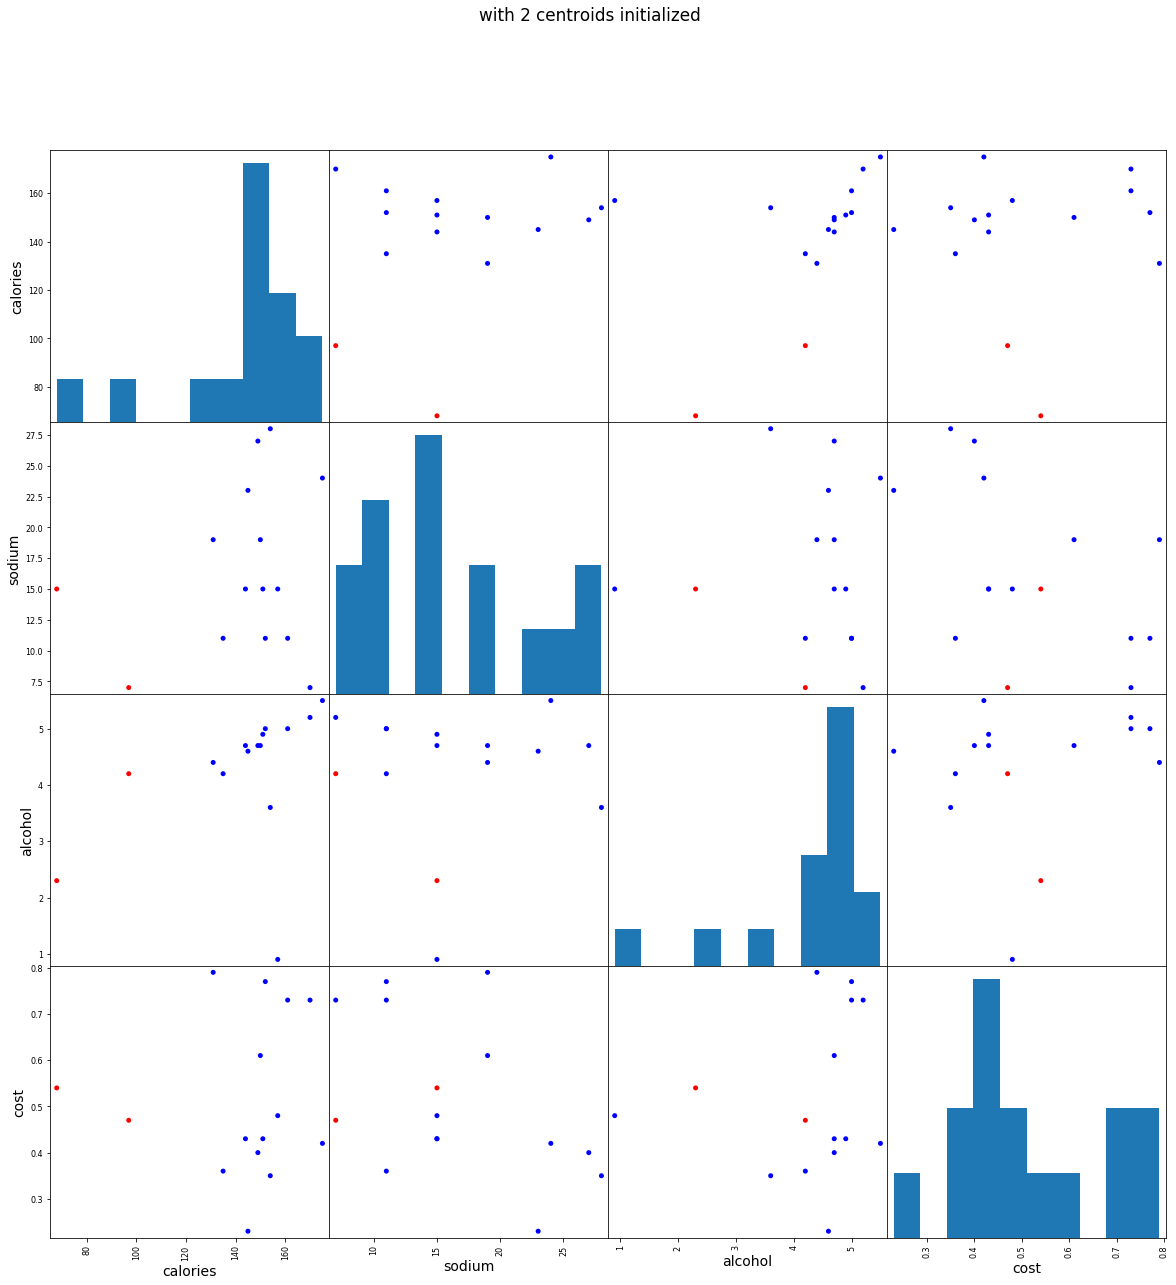

In [14]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100,alpha=1,c=colors[beer['cluster2']],figsize=(20,20))
plt.suptitle("with 2 centroids initialized")

Scaled data //扩展的数据

In [15]:
#对数据归一化处理，原来的数据有的是三位数，有的是小数，计算起来不公平。
#聚类之前都要做这样的处理，归一化，标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scalerd = scaler.fit_transform(X)
X_scalerd

array([[ 0.05272555, -0.22564399,  0.37901002, -0.51693547],
       [ 0.31635333, -0.22564399,  0.5512873 , -0.51693547],
       [ 0.54231999, -0.22564399, -2.89425833, -0.21639159],
       [ 1.03191443, -1.45642941,  0.80970322,  1.28632779],
       [ 0.69296443, -0.8410367 ,  0.63742594,  1.28632779],
       [ 0.35401444, -0.8410367 ,  0.63742594,  1.52676289],
       [ 0.09038667,  1.00514142,  0.29287138, -1.71911097],
       [ 1.22021998,  1.1589896 ,  1.06811915, -0.57704424],
       [ 0.24103111,  1.62053413,  0.37901002, -0.69726179],
       [ 0.42933666,  1.77438231, -0.56851503, -0.99780567],
       [-0.28622444, -0.8410367 , -0.05168318, -0.93769689],
       [ 0.27869222,  0.38974871,  0.37901002,  0.56502249],
       [-2.80951884, -0.22564399, -1.68831736,  0.14426106],
       [-0.43686888,  0.38974871,  0.1205941 ,  1.64698044],
       [-1.71734664, -1.45642941, -0.05168318, -0.27650037]])

In [16]:
km = KMeans(n_clusters=3).fit(X_scalerd)

In [17]:
beer['scaler_cluster'] = km.labels_
beer.sort_values('scaler_cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaler_cluster
2,LowernBrau,157,15,0.9,0.48,0,1,0
10,Qsedse,135,11,4.2,0.36,0,1,0
12,Snsef,68,15,2.3,0.54,1,0,0
14,Ssdfi,97,7,4.2,0.47,1,0,0
3,Kronenbourg,170,7,5.2,0.73,2,1,1
4,Abbnes,161,11,5.0,0.73,2,1,1
5,Lieksl,152,11,5.0,0.77,0,1,1
11,Abbiue,150,19,4.7,0.61,0,1,1
13,Ocean,131,19,4.4,0.79,0,1,1
0,Budweiser,144,15,4.7,0.43,0,1,2


In [18]:
beer.groupby('scaler_cluster').mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaler_cluster,,,,,,
0,114.25,12.0,2.900000,0.462500,0.500000,0.5
1,152.80,13.4,4.860000,0.726000,0.800000,1.0
2,153.00,22.0,4.666667,0.376667,0.333333,1.0


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


Text(0.5,0.98,'with 3 centroids initialized')

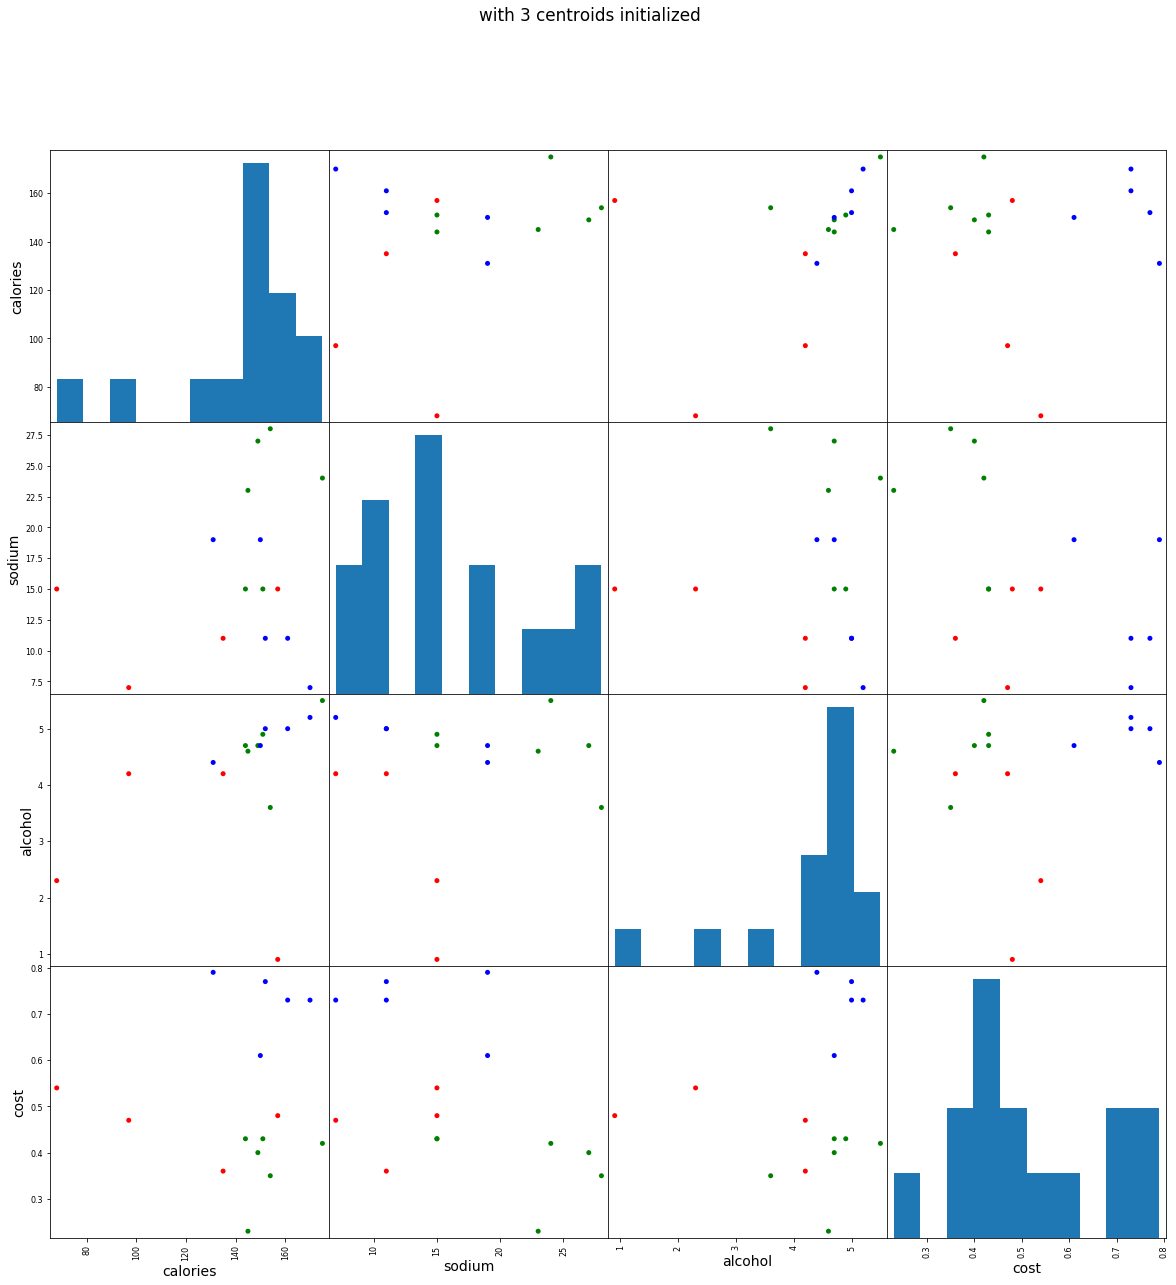

In [19]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100,alpha=1,c=colors[beer['scaler_cluster']],figsize=(20,20))
plt.suptitle("with 3 centroids initialized")

# 聚类评估：轮廓系数（silhouette Coefficient)
    s(i) = (b(i) - a(i)) / max{a(i),b(i)}

    si(i) = 1 - a(i)/b(i)  a(i)<b(i)
    si(i) = 0              a(i)=b(i)
    si(i) = b(i)/a(i) - 1  a(i)>b(i)

    1.计算样本i到同簇其他样本的平均距离ai。ai越小，说明样本i越应该被聚类到该簇。将ai称为样本i的簇内不相似度
    2.计算样本i到其他某簇Cj的所有样本的平均距离bij，称为样本i于簇Cj的不相似度。
      定义为样本i的簇间不相似度：bi=min{bi1,bi2,...bin}
    3.si接近1，则说明样本i聚类合理
    4.si接近-1，则说明样本i更应该聚类到另外的簇
    5.若si近似为0，则说明i在两个簇的边界上

In [20]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaler_cluster) #标准化聚类得分值
score = metrics.silhouette_score(X,beer.cluster) #普通聚类得分值
print(score_scaled,score)

-0.02933855228854573 0.4191914572808516


In [23]:
scores = []
for k in range(2,15):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X,labels)
    scores.append(score)
scores

[0.7156004763076081,
 0.4191914572808516,
 0.32043148467916,
 0.324497803514275,
 0.27390485755835137,
 0.2931519052154566,
 0.25122225372305595,
 0.20627721916332048,
 0.15306119830029027,
 0.1430758019018026,
 0.11691213906421878,
 0.06210661140797425,
 0.02383169468266084]

Text(0,0.5,'Silhouette score')

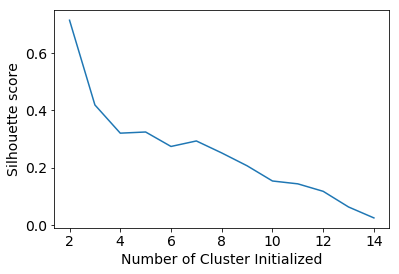

In [25]:
plt.plot(list(range(2,15)),scores)
plt.xlabel("Number of Cluster Initialized")
plt.ylabel("Silhouette score")

## DBSCAN clustering

In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [27]:
labels = db.labels_

In [28]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaler_cluster,cluster_db
7,Nkilse,175,24,5.5,0.42,2,1,2,-1
12,Snsef,68,15,2.3,0.54,1,0,0,-1
14,Ssdfi,97,7,4.2,0.47,1,0,0,-1
0,Budweiser,144,15,4.7,0.43,0,1,2,0
1,Schlitz,151,15,4.9,0.43,0,1,2,0
2,LowernBrau,157,15,0.9,0.48,0,1,0,0
3,Kronenbourg,170,7,5.2,0.73,2,1,1,0
4,Abbnes,161,11,5.0,0.73,2,1,1,0
5,Lieksl,152,11,5.0,0.77,0,1,1,0
6,Nkiwkk,145,23,4.6,0.23,0,1,2,0


In [29]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaler_cluster
cluster_db,,,,,,,
-1,113.333333,15.333333,4.000,0.476667,1.333333,0.333333,0.666667
0,149.916667,16.750000,4.325,0.525833,0.333333,1.000000,1.250000


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


Text(0.5,0.98,'dbscan centroids initialized')

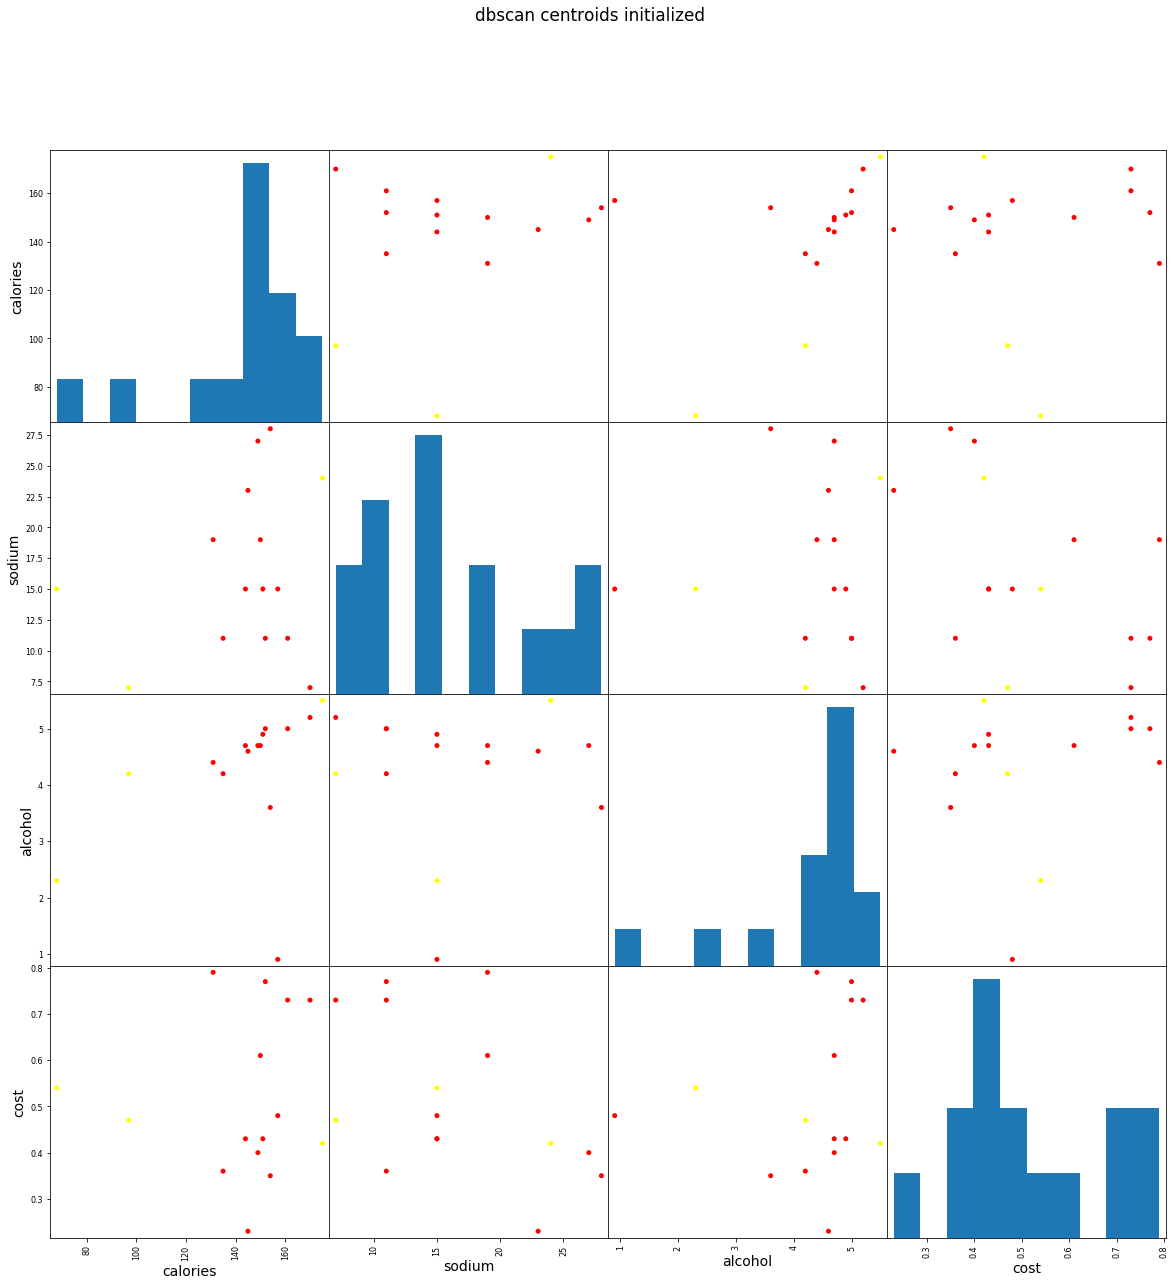

In [30]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100,alpha=1,c=colors[beer['cluster_db']],figsize=(20,20))
plt.suptitle("dbscan centroids initialized")